In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_transaction = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_transaction.csv')
df_product = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_product.csv')

#merge tabel
df_merged = pd.merge(df_transaction, df_product, on= 'product_id', how = 'left')
df_merged['trx_date'] = pd.to_datetime(df_merged['trx_date'].astype(str), format = '%d%m%Y', errors = 'coerce')
df_merged['units'] = df_merged['units'].fillna(0).astype(int)
df_merged = df_merged.dropna().drop_duplicates()

print(df_merged.info())
print(df_merged.head())



<class 'pandas.core.frame.DataFrame'>
Index: 168837 entries, 0 to 170048
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trx_id            168837 non-null  object        
 1   product_id        168837 non-null  object        
 2   trx_date          168837 non-null  datetime64[ns]
 3   units             168837 non-null  int64         
 4   product_name      168837 non-null  object        
 5   product_category  168837 non-null  object        
 6   product_cost      168837 non-null  int64         
 7   product_price     168837 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 11.6+ MB
None
       trx_id    product_id   trx_date  units        product_name  \
0  DQTrx00002  DQProduk-001 2024-01-10      1   Buku Agenda DQLab   
1  DQTrx00014  DQProduk-009 2024-01-10      1  Pulpen Metal DQLab   
2  DQTrx00034  DQProduk-001 2024-01-10      1   Buku Agenda DQL

Index(['Sticky Notes DQLab', 'Kertas Warna DQLab', 'Buku Agenda DQLab'], dtype='object', name='product_name')
   trx_month    product_id        product_name  units
0 2024-01-01  DQProduk-001   Buku Agenda DQLab   3709
1 2024-01-01  DQProduk-003  Sticky Notes DQLab   1243
3 2024-01-01  DQProduk-019  Kertas Warna DQLab     17
4 2024-02-01  DQProduk-001   Buku Agenda DQLab   3227
5 2024-02-01  DQProduk-003  Sticky Notes DQLab    813
product_name
Sticky Notes DQLab    90767
Kertas Warna DQLab    60028
Buku Agenda DQLab     57577
Pulpen Metal DQLab    37883
Name: units, dtype: int64


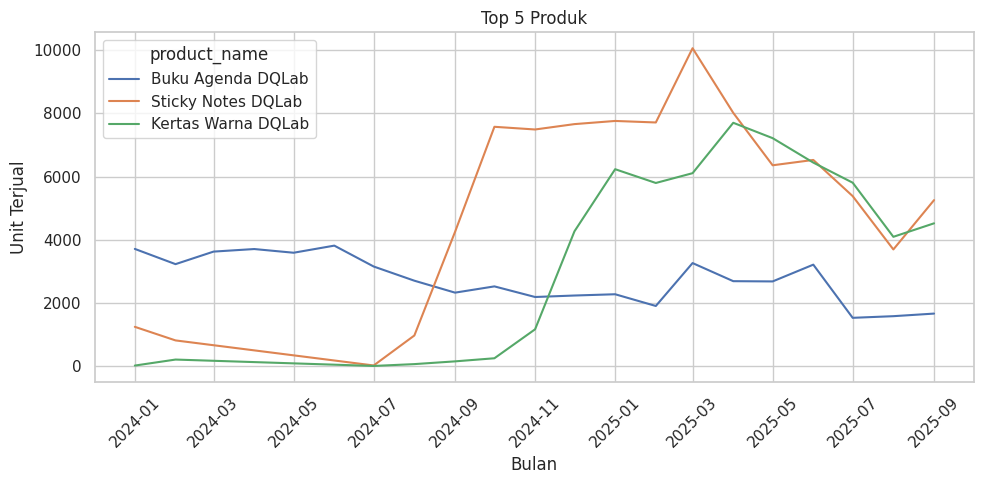

In [20]:
# buat tabel bulan
df_merged['trx_month'] = df_merged['trx_date'].dt.to_period('M').dt.to_timestamp()

# agregasi by month
sales_summary = df_merged.groupby(['trx_month', 'product_id','product_name'])['units'].sum().reset_index()

# top 5
top5 = sales_summary.groupby('product_name')['units'].sum().nlargest(3).index

# filter produk
df_top_sales = sales_summary[sales_summary['product_name'].isin(top5)].copy()

print(top5)
print(df_top_sales.head())

# cek data
ceki = sales_summary.groupby('product_name')['units'].sum().sort_values(ascending=False)
print(ceki)


# visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(data = df_top_sales, x = 'trx_month', y = 'units', hue = 'product_name')
plt.title("Top 5 Produk")
plt.xlabel('Bulan')
plt.ylabel('Unit Terjual')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



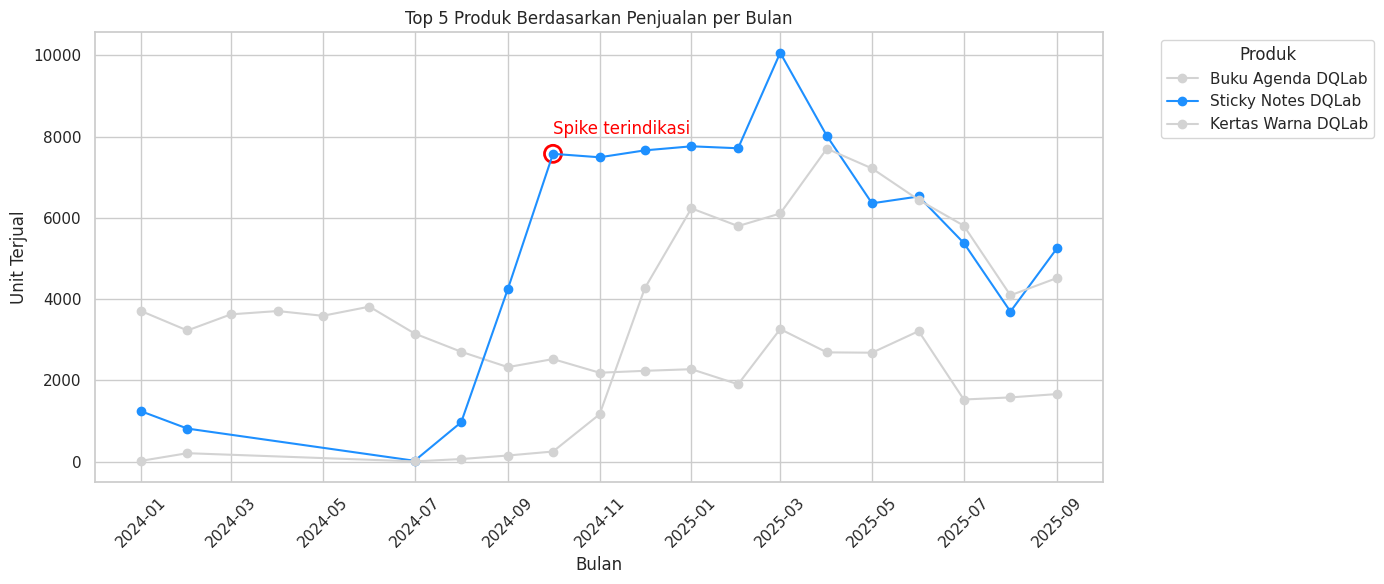

In [21]:
# remastered visualisasi supaya menonjolkan product dengan sales tertinggi (sticky notes)
plt.figure(figsize=(14,6))

target_produk = 'Sticky Notes DQLab'
colors = {
    name: 'dodgerblue' if name == target_produk else 'lightgray' for name in df_top_sales['product_name'].unique()
}

for product_name in df_top_sales['product_name'].unique():
  data = df_top_sales[df_top_sales['product_name'] == product_name]
  plt.plot(data['trx_month'], data['units'], label = product_name,
           marker = 'o', color = colors[product_name])

# tambah lingkaran di bulan ke-10
data_sticky = df_top_sales[df_top_sales['product_name'] == target_produk]
data_sticky = data_sticky.sort_values('trx_month').reset_index(drop=True)

# asumsikan spike pada bulan ke-10 ada pada indeks ke-5
if len(data_sticky) >= 10:
  spike_month = data_sticky.loc[5, 'trx_month']
  spike_units = data_sticky.loc[5, 'units']
  plt.scatter(spike_month, spike_units, s = 150, facecolors = 'none',
              edgecolors = 'red', linewidths = 2)
  plt.text(spike_month, spike_units + 500, 'Spike terindikasi', color='red')

plt.title("Top 5 Produk Berdasarkan Penjualan per Bulan")
plt.xlabel('Bulan')
plt.ylabel('Unit Terjual')
plt.grid(True)
plt.legend(title='Produk', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


        stock_id       date           product_name product_category  \
16722   DQ-P-LCD 2025-09-30  Lakban + Cutter DQLab       Pengemasan   
16723   DQ-E-TMD 2025-09-30   Timbangan Mini DQLab       Elektronik   
16724   DQ-E-SMD 2025-09-30     Speaker Mini DQLab       Elektronik   
16725  DQ-KC-KUD 2025-09-30     Kartu Ucapan DQLab   Kertas & Cetak   
16726  DQ-KC-KUD 2025-09-30     Kartu Ucapan DQLab   Kertas & Cetak   

       unit_sold   price    cost  stock_available  
16722        112  134850  119850              149  
16723         22  224850  179850               38  
16724          8  389850  314850               79  
16725         46  119850   59850              106  
16726         46  119850   59850              106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16727 entries, 0 to 16726
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   stock_id          16727 non-null  object

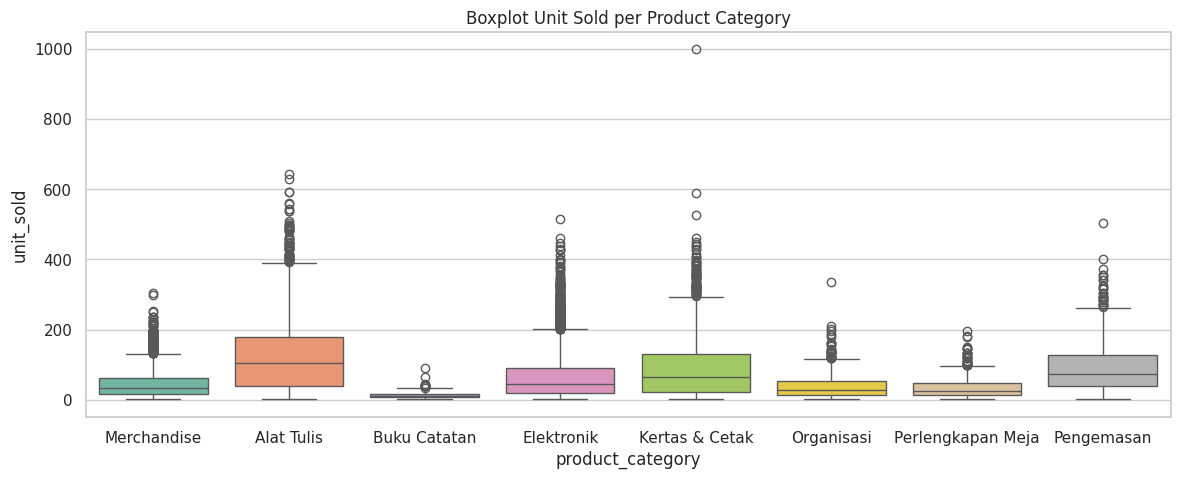

In [22]:
# Deteksi Outlier
# Note: data ini beda sama data sebelumnya.
df_merged2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/stock.csv')
df_merged2['date'] = pd.to_datetime(df_merged2['date'].astype(str), format = '%m/%d/%Y')

print(df_merged2.tail())
print(df_merged2.info())

# Outlier Kategori
plt.figure(figsize=(14,5))
sns.boxplot(data = df_merged2, x = 'product_category', y = 'unit_sold', hue = 'product_category', palette = 'Set2', legend = False)
plt.title("Boxplot Unit Sold per Product Category")
plt.show()



/tmp/ipython-input-847821296.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = 'right')
/tmp/ipython-input-847821296.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha = 'right')


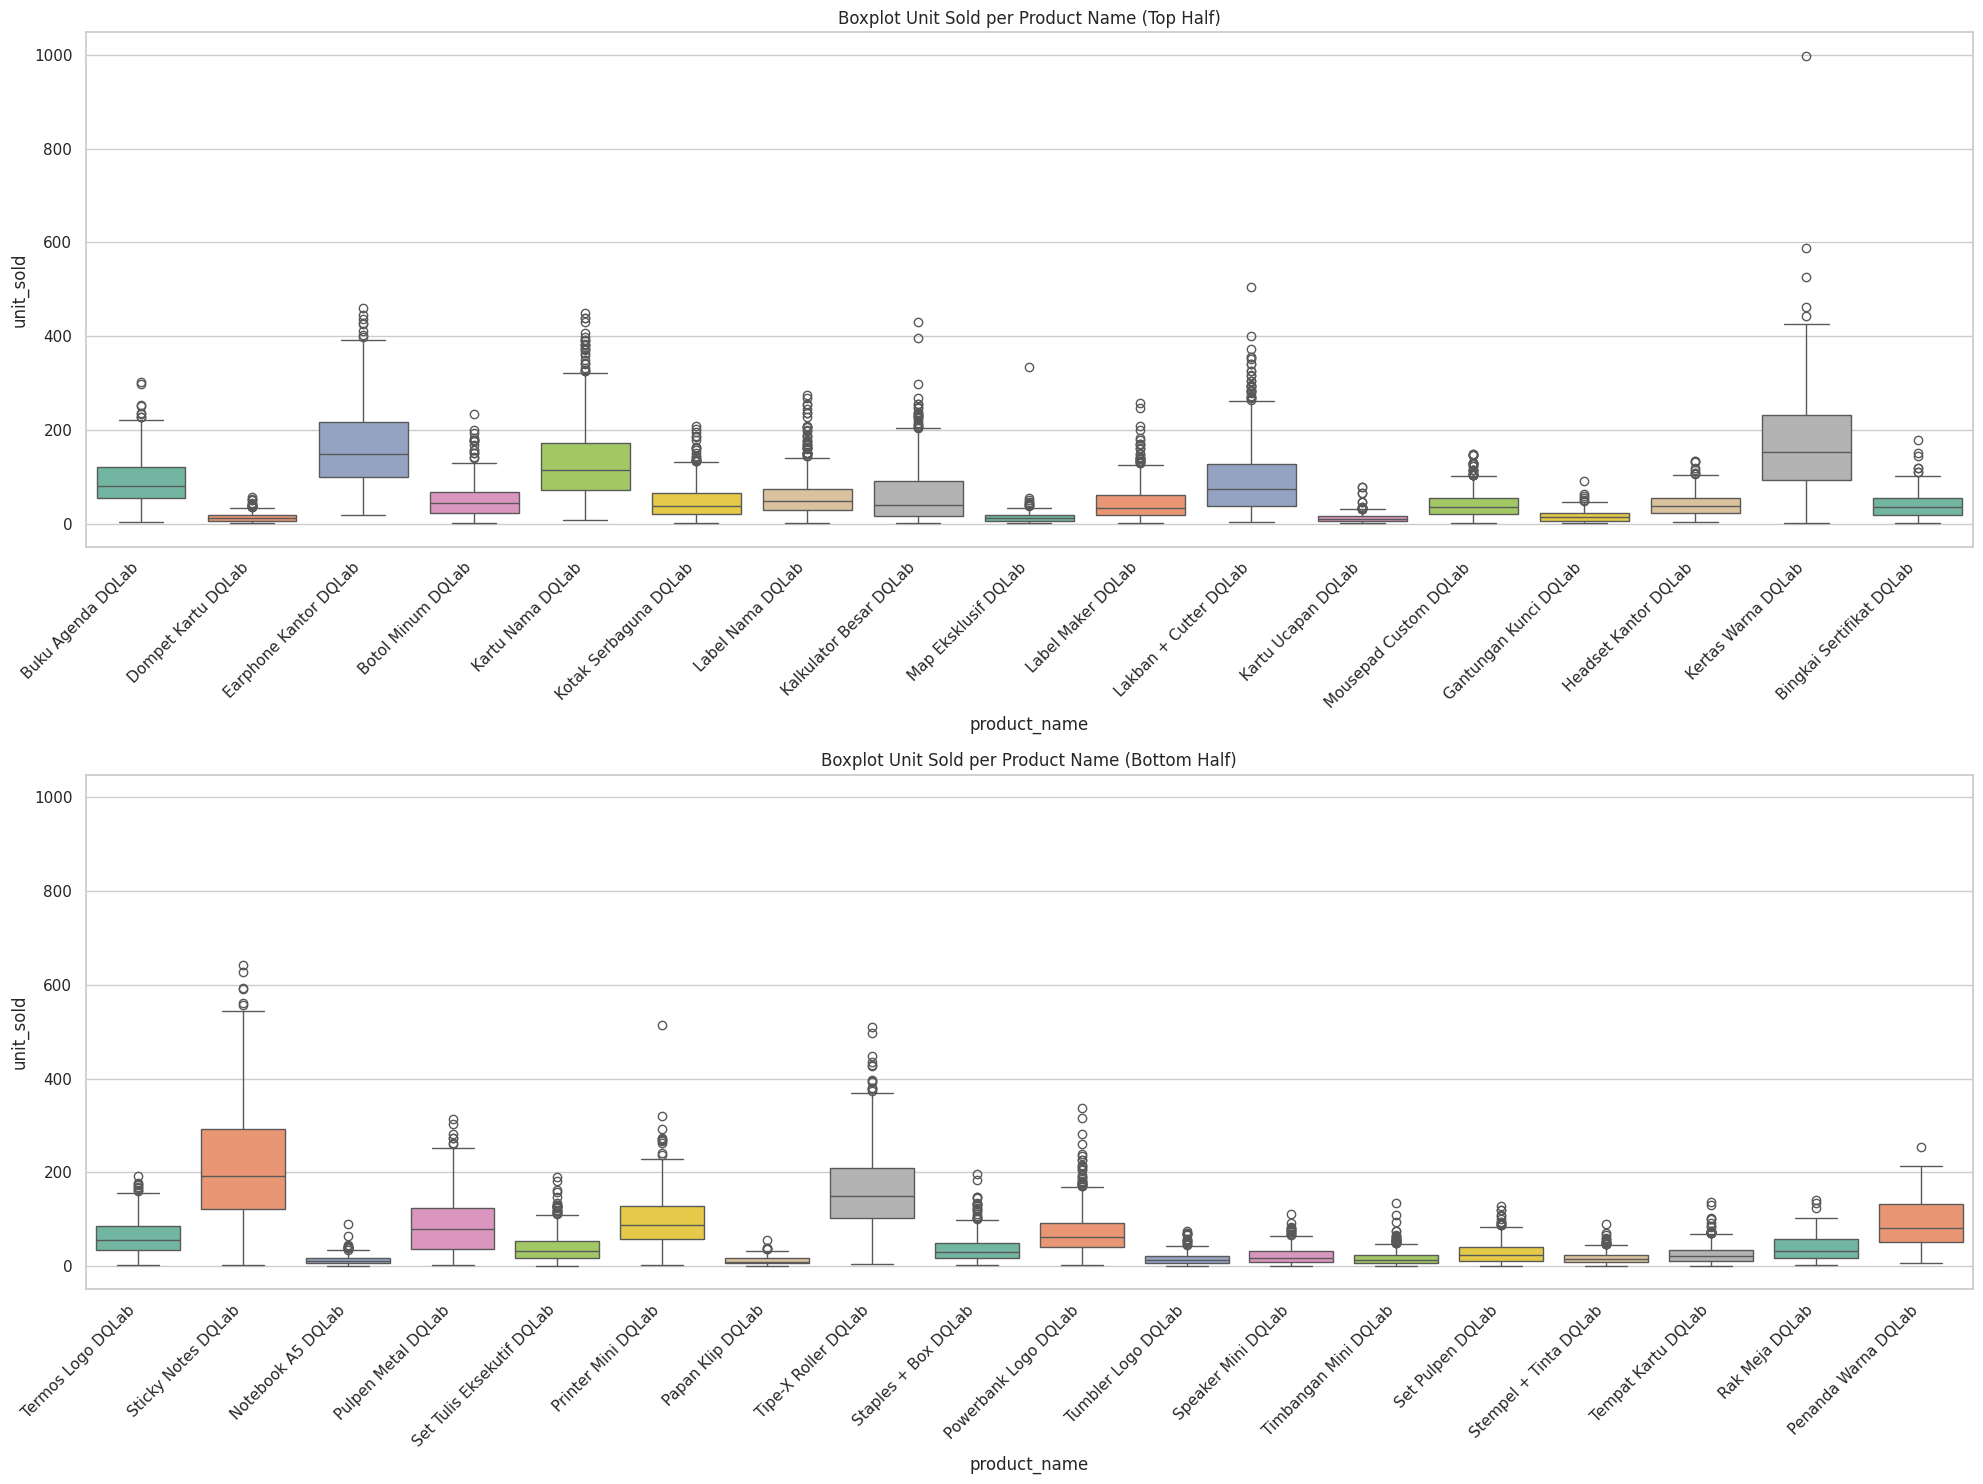

In [23]:
# Outlier berdasarkan product name
# ambil daftar unik prod name dan bagi 2 soalnya kebanyakan kalo disatukan
product_names = sorted(df_merged2['product_name'].unique())
midpoint = len(product_names) // 2
top_half = product_names[:midpoint]
bottom_half = product_names[midpoint:]

# filter masing-masing grup
df_top = df_merged2[df_merged2['product_name'].isin(top_half)]
df_bottom = df_merged2[df_merged2['product_name'].isin(bottom_half)]

# Visualisasi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15), sharey=True)

sns.boxplot(data=df_top, x='product_name', y = 'unit_sold', hue = 'product_name', palette = 'Set2', ax = ax1)
ax1.set_title('Boxplot Unit Sold per Product Name (Top Half)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = 'right')

sns.boxplot(data = df_bottom, x = 'product_name', y = 'unit_sold', hue = 'product_name', palette = 'Set2', ax = ax2)
ax2.set_title('Boxplot Unit Sold per Product Name (Bottom Half)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

Total User Tiap Tingkatan:
view           80125032
click          63423975
add_to_cart    11652997
purchase        1166672
dtype: int64

Conversion Rate:
purchase         1.46
add_to_cart     14.54
click           79.16
view           100.00
dtype: float64


/tmp/ipython-input-3635361727.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  conversion_rate = round((total_funnel/total_funnel[0])*100,2).sort_values(ascending=True)


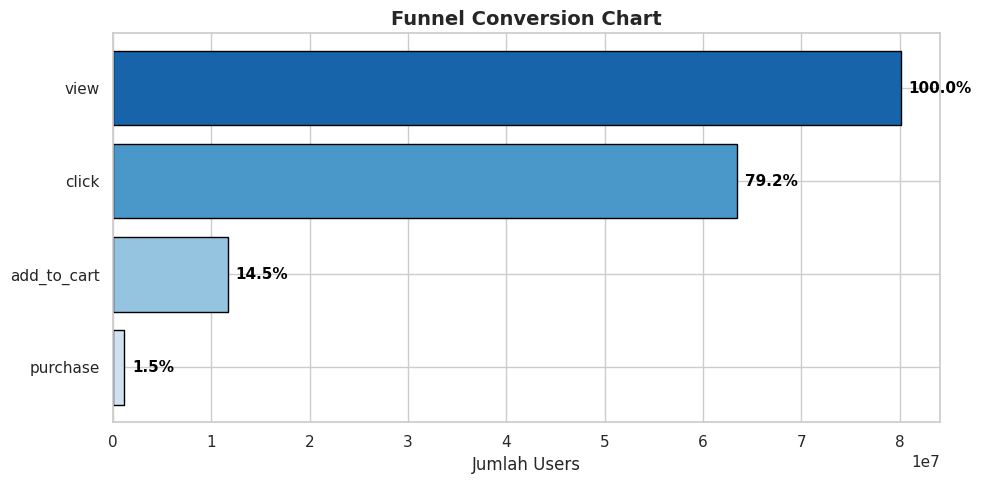

In [24]:
# Funnel Conversion Chart
df_funnel = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_funnel.csv')
df_product = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_product.csv')

df_merged3 = pd.merge(df_funnel, df_product, on = 'product_id', how = 'left')
df_merged3['date'] = pd.to_datetime(df_merged3['date'].astype(str), format = '%d%m%Y', errors = 'coerce')

# total user tiap tingkatan
print('Total User Tiap Tingkatan:')
total_funnel = df_merged3[['view', 'click', 'add_to_cart', 'purchase']].sum()
print(total_funnel.head())

# conversion rate
print('\nConversion Rate:')
conversion_rate = round((total_funnel/total_funnel[0])*100,2).sort_values(ascending=True)
#conversion_rate = conversion_rate[1:]
print(conversion_rate.head())

# urutkan tahap dari atas dan bawah
stages = total_funnel.index.tolist()
values = total_funnel.values.tolist()

color = sns.color_palette('Blues', len(stages))[::-1]

plt.figure(figsize=(10,5))
for i, (stage, value) in enumerate(zip(stages, values)):
    plt.barh(stage, value, color=color[i], edgecolor="black")

    # Hitung persentase dari tahap awal
    percent = f"{value/values[0]*100:.1f}%"

    # Teks di luar bar (kanan)
    plt.text(value + max(values)*0.01, i, percent, va='center', ha='left',
             color='black', fontsize=11, fontweight='bold')

plt.gca().invert_yaxis()
plt.title("Funnel Conversion Chart", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Users")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3901369664.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_merged2['margin'], bins=30, palette = 'Set2', kde=True, edgecolor = 'Black')


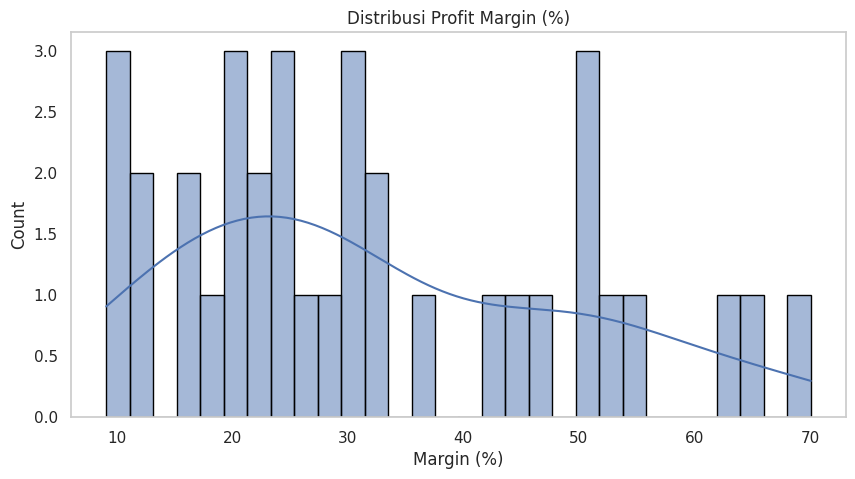

In [29]:
# Distribusi Profit Margin (%)
#Hitung margin terlebih dahulu
df_merged2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/stock.csv')
df_merged2['margin'] = round(((df_merged2['price']-df_merged2['cost'])/df_merged2['price'])*100, 2)

#Kelompokkan berdasarkan product_name dan hitung rata-rata margin
df_merged2 = df_merged2.groupby('product_name', as_index = False).agg({
    'margin': 'mean',
    'price': 'mean',
    'cost': 'mean',
    'stock_available': 'sum'
})

#Urutkan berdasarkan margin terbesar
df_merged2 = df_merged2.sort_values(by = 'margin', ascending = False)

#Buat kategori margin
def margin_category(margin):
    if margin >= 40 :
        return 'High'
    elif margin >= 20:
        return 'Medium'
    else:
        return 'Low'

df_merged2['margin_category'] = df_merged2['margin'].apply(margin_category)
plt.figure(figsize=(10,5))
sns.histplot(df_merged2['margin'], bins=30, palette = 'Set2', kde=True, edgecolor = 'Black')
plt.title('Distribusi Profit Margin (%)')
plt.xlabel('Margin (%)')
plt.grid(False)
plt.show()

/tmp/ipython-input-1272192534.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_merged2['margin'], bins=30, palette = 'Set2', kde=True, edgecolor = 'Black')


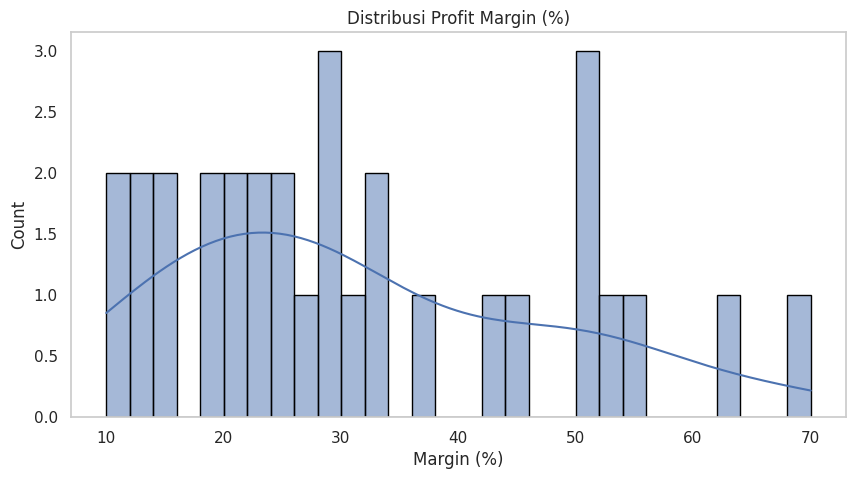

In [26]:
# Distribusi Profit Margin (%)
#Hitung margin terlebih dahulu
df_merged2['margin'] = round(((df_merged2['price']-df_merged2['cost'])/df_merged2['price'])*100, 2)

#Kelompokkan berdasarkan product_name dan hitung rata-rata margin
df_merged2 = df.groupby('product_name', as_index = False).agg({
    'margin': 'mean',
    'price': 'mean',
    'cost': 'mean',
    'stock_available': 'sum'
})

#Urutkan berdasarkan margin terbesar
df_merged2 = df_merged2.sort_values(by = 'margin', ascending = False)

#Buat kategori margin
def margin_category(margin):
    if margin >= 40 :
        return 'High'
    elif margin >= 20:
        return 'Medium'
    else:
        return 'Low'

df_merged2['margin_category'] = df_merged2['margin'].apply(margin_category)
plt.figure(figsize=(10,5))
sns.histplot(df_merged2['margin'], bins=30, palette = 'Set2', kde=True, edgecolor = 'Black')
plt.title('Distribusi Profit Margin (%)')
plt.xlabel('Margin (%)')
plt.grid(False)
plt.show()

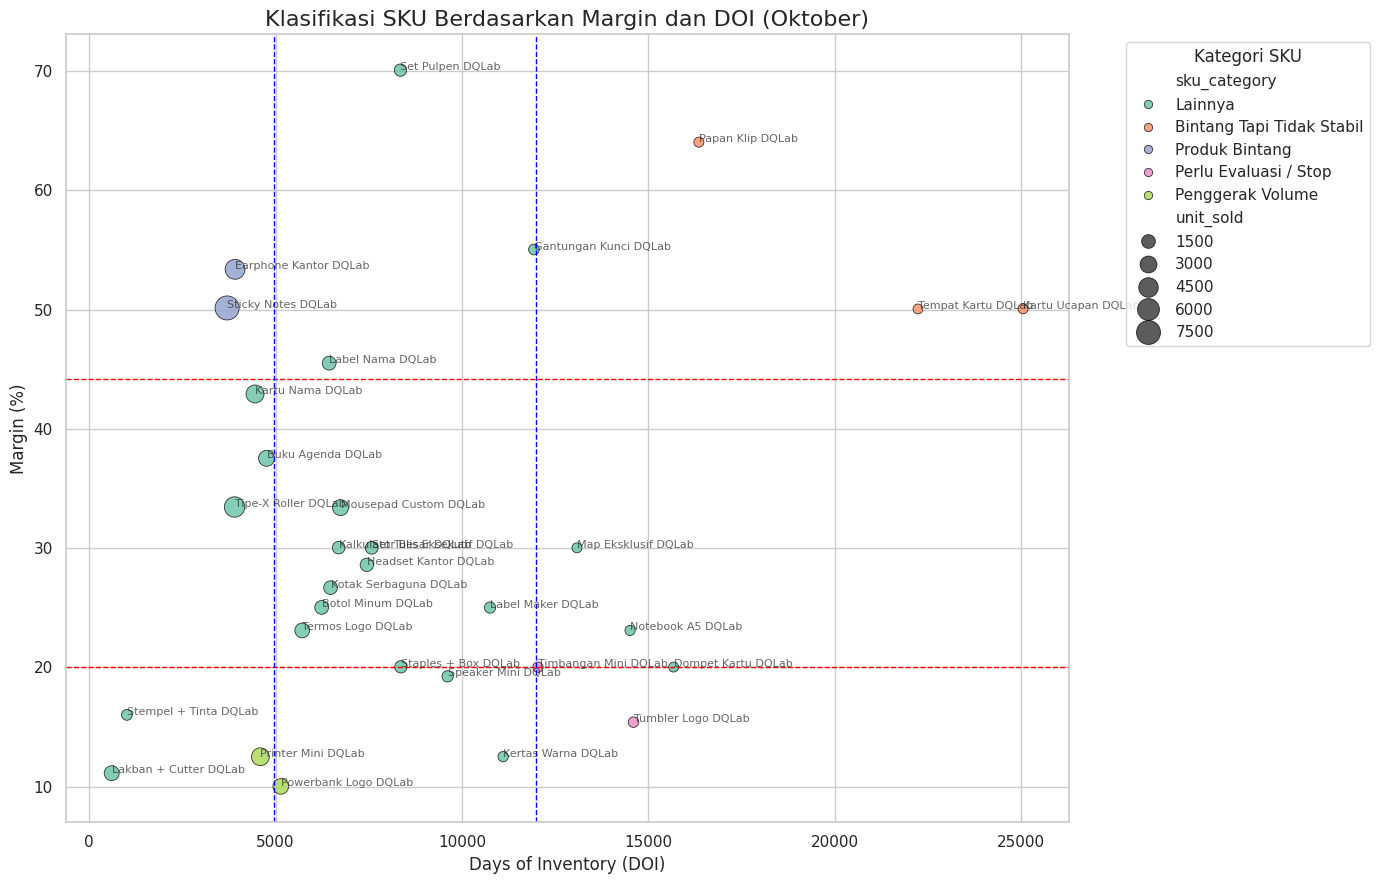

In [27]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/margin_doi.csv')

# ======== VISUALISASI ========= #
sns.set(style="whitegrid")
plt.figure(figsize=(14, 9))

# Scatter plot
scatter = sns.scatterplot(
    data = df,
    x = 'doi',
    y = 'margin',
    hue = 'sku_category',
    size = 'unit_sold',
    sizes = (50, 300),
    palette = 'Set2',
    alpha = 0.8,
    edgecolor = 'black'
)
# Hitung kuartil
margin_q = df['margin'].quantile([0.25, 0.5, 0.75])
doi_q = df['doi'].quantile([0.25, 0.5, 0.75])

# Garis kuartil
plt.axhline(margin_q[0.75], color = 'red', linestyle = '--', linewidth = 1)
plt.axhline(margin_q[0.25], color = 'red', linestyle = '--', linewidth = 1)
plt.axvline(doi_q[0.75], color = 'blue', linestyle = '--', linewidth = 1)
plt.axvline(doi_q[0.25], color = 'blue', linestyle = '--', linewidth=1)

# Tambahkan label nama produk di setiap titik
for i, row in df.iterrows():
    if not pd.isna(row['doi']) and not pd.isna(row['margin']):
        plt.text(row['doi'] + 1, row['margin'], row['product_name'],
                 fontsize = 8, alpha = 0.7)

# Label dan layout
plt.title('Klasifikasi SKU Berdasarkan Margin dan DOI (Oktober)', fontsize = 16)
plt.xlabel('Days of Inventory (DOI)')
plt.ylabel('Margin (%)')
plt.legend(title = 'Kategori SKU', bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.tight_layout()

# Tampilkan
plt.show()